In [1]:
# Problema de Ahorro Optimo de Leo Messi
#
# Angelo Gutierrez Daza
# 2020
#
# Programacion II
# Programa de Estudios Superiores
# Banco de Guatemala

#Integrantes:
# Joaquin Gordillo Sajbin
# Marianna Guzman
# Luis Fernando Lemus

################################################################################
# 1) Problema de Ahorro Optimo de Leo Messi: Definicion del Problema
################################################################################


## Valores de los parametros
beta   = 0.98  ; # Factor de descuento de Leo
sigma  = 1.5   ; # Coeficiente de aversion al riesgo de Messi
T      = 70    ; # Horizonte de vida que le queda a la pulga
A_0    = 0     ; # Valor inicial de sus activos
A_T    = 0     ; # Herencia que deja Leo a Thiago Messi

## Sendas para las variables exogenas

# Tasa de interes a la que Mascherano presta (o pide prestado) a Leo

################################################################################
#IMPORTANTE: PARA VER LOS DIFERENTES ESCENARIOS DE TASA DE INTERES R:
#DESCOMENTAR CADA ESCENARIO PARA VISUALIZARLO
################################################################################

R = 1/beta-0.02 # Perfil de consumo creciente (Se endeuda)
#R = 1/beta+0.02 # Perfil de consumo decreciente (Ahorra)
#R = 1/beta      # Perfil de consumo constante a traves del tiempo

In [2]:
## Proceso para el ingreso de Leo
import numpy as np
Y = np.ones(T+1)

# Descomente la siguiente linea para asumir que Leo se retira a los 40 
#Y[40:T+1]=0 

# Descomente el siguiente bloque para simular un proceso de ingreso mas
# complicado donde el FC Barcelona sube a Leo su sueldo anualmente
g = 0.04 # Tasa de crecimiento del ingreso
Y = np.arange(T+1).astype(np.float)
Y[0] = 1
for t in range(1,T+1):
    Y[t]=(1+g)*Y[t-1]
Y[40:T+1]=0 # Se retira a los 40


In [3]:
Y #El ingreso de Leo, asumimos que el FCB le sube el ingreso anualmente 4% y que a los 40 se retira.

array([1.        , 1.04      , 1.0816    , 1.124864  , 1.16985856,
       1.2166529 , 1.26531902, 1.31593178, 1.36856905, 1.42331181,
       1.48024428, 1.53945406, 1.60103222, 1.66507351, 1.73167645,
       1.80094351, 1.87298125, 1.9479005 , 2.02581652, 2.10684918,
       2.19112314, 2.27876807, 2.36991879, 2.46471554, 2.56330416,
       2.66583633, 2.77246978, 2.88336858, 2.99870332, 3.11865145,
       3.24339751, 3.37313341, 3.50805875, 3.6483811 , 3.79431634,
       3.94608899, 4.10393255, 4.26808986, 4.43881345, 4.61636599,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [4]:

# Veamos como luce el ingreso
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

X = np.linspace(0,T+1,T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Ingreso de Leo")
plt.savefig("Ingreso de Leo.pdf")
plt.show()

<Figure size 800x600 with 1 Axes>

In [5]:
# Note que Leo no solo tiene gran vision en el campo de juego sino tambien en
# este modelo

# Esto le permite saber con certeza su ingreso en cada periodo de su vida,
# inclusive su ingreso futuro

## Funcion de utilidad instantanea de Leo
def U_t(C):
    if sigma==1:
        return np.log(C)
    else:
        return(C**(1-sigma)-1)/(1-sigma)

## Funcion objetivo de Leo
def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec)             # Vector con el rezago de los acivos
    A_vec     = np.append(A_vec, A_T)            # Vector de activos
    C_vec     = R*A_vec_lag+Y-A_vec       # Vector de consumo en cada periodo
    beta_vec  = beta**(np.arange(0,T+1))  # Vector con tasas de descuento
    bienestar = sum(beta_vec*U_t(C_vec))  # Funcion objetivo del problema
    return -bienestar #Devuelve -bienestar porque se quiere maximizar la utilidad

In [6]:

################################################################################
# 2) Problema de Ahorro Optimo de Leo Messi: Solucion cuando sigma = 1
################################################################################
sigma=1
# Bajo ciertos supuestos, la solucion del modelo se puede hallar con lapiz y 
# papel: sigma=1 y A0=AT=0

# Valor presente del ingreso de Leo
Y_bar= sum(Y/(R**(np.arange(T+1))))

# Consumo
C0 = ((1-beta)/(1-beta**(T+1)))*Y_bar
C_initval = ((beta*R)**(np.arange(T+1)))*C0

# Activos 
A_initval= np.zeros(T).astype(np.float)
A_initval[0] = R*A_0+Y[0]-C_initval[0]
for t in range(1,T):
    A_initval[t] = R*A_initval[t-1]+Y[t]-C_initval[t]


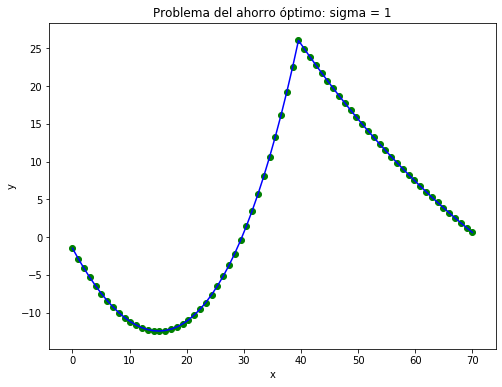

In [7]:

# Y grafiquemos
X = np.linspace(0,T,T)
plt.figure(figsize=(8, 6))
plt.plot(X, A_initval, 'b')
plt.scatter(X, A_initval, s=None, color="green") 
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Problema del ahorro óptimo: sigma = 1")
plt.savefig("Ahorro óptimo sigma igual a 1.pdf")
plt.show()


In [8]:
import scipy as spy
from scipy.optimize import minimize

################################################################################
# 3) Problema de Ahorro Optimo de Leo Messi: Solucion cuando sigma != 1
################################################################################

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial
x0=A_initval 
minimize(messi_func, x0)
A_t=minimize(messi_func, x0).x
A_t

array([ -1.4701402 ,  -2.85246571,  -4.14628961,  -5.35084212,
        -6.46526833,  -7.48862589,  -8.41988254,  -9.25791357,
       -10.00149907, -10.64932114, -11.19996094, -11.6518956 ,
       -12.00349493, -12.25301812, -12.39861015, -12.43829811,
       -12.36998734, -12.1914574 , -11.90035788, -11.49420395,
       -10.97037185, -10.32609407,  -9.55845435,  -8.6643825 ,
        -7.64064895,  -6.48385911,  -5.19044747,  -3.75667145,
        -2.17860498,  -0.45213184,   1.42706131,   3.46349216,
         5.66189033,   8.02720521,  10.56461417,  13.27953106,
        16.17761512,  19.26478025,  22.54720458,  26.03134056,
        24.92290474,  23.83595009,  22.77005547,  21.72480802,
        20.69980295,  19.6946434 ,  18.70894032,  17.74231224,
        16.7943852 ,  15.86479256,  14.95317487,  14.05917971,
        13.18246159,  12.32268177,  11.47950816,  10.65261519,
         9.84168365,   9.04640059,   8.26645921,   7.50155871,
         6.75140419,   6.01570652,   5.29418225,   4.58

In [9]:
# Peguemos el valor terminal
A_t = np.append(A_t,A_T)

# Calculemos el consumo de Leo
C_t = np.zeros(T).astype(np.float)

for t in range(0,T):
    if t==0:
        C_t[0] = A_0*R+Y[0]-A_t[0]
        
    else:
        C_t[t] = A_t[t-1]*R+Y[t]-A_t[t]

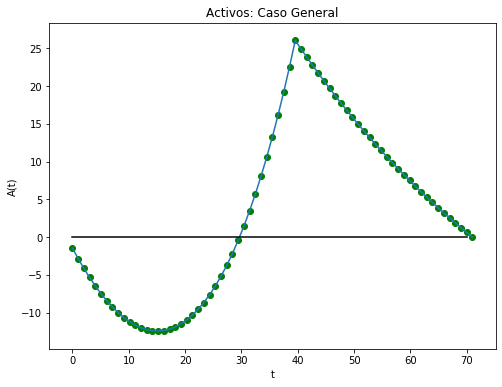

In [10]:
# Y grafiquemos
X = np.linspace(0,T+1,T+1)
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, A_t,Fcero, 'black')
plt.scatter(X, A_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('A(t)')
plt.title(r"Activos: Caso General")
plt.savefig("Activos Caso General.pdf")
plt.show()



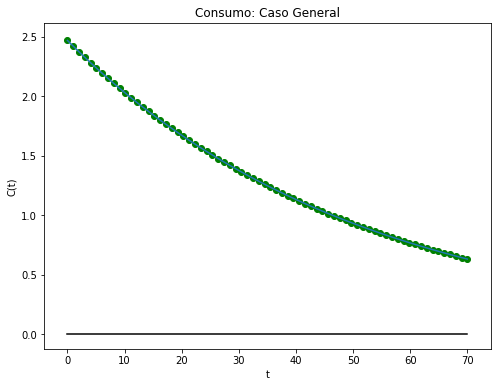

In [11]:
# plot(C_t,col="black",type="p",ylab="C(t)",xlab="t",
#     main="Consumo: Caso General", ylim=c(0, 2*max(Y)))
# lines(C_t,col="red"); lines(rep(0,T))
X = np.linspace(0,T,T)
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, C_t,Fcero, 'black')
plt.scatter(X, C_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('C(t)')
plt.title(r"Consumo: Caso General")
plt.savefig("Consumo Caso General.pdf")
plt.show()

In [12]:
################################################################################
# 3) Problema de Ahorro Optimo de Leo Messi: Solucion con restricciones de deuda
################################################################################

# Supongamos ahora que el malvado gobierno espanol,al servicio del Real Madrid,
# decide atacar a Leo con un proceso por fraude fiscal. Esto impide al mejor de
# la historia contraer deudas por encima de un umbral A_bound, incluso con su
# amigo Mascherano

# Por lo anterior, At>=A_bound en todo periodo

# Usamos el algoritmo optim() incluyendo una restriccion de desigualdad en cero

A_bound = 0
# A_bound = -0.1

# Valor inicial
x0 = np.zeros(len(A_initval)).astype(np.float)
for i in range(0,len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])

x0

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.42706131,  3.46349216,  5.66189033,  8.02720521, 10.56461417,
       13.27953106, 16.17761512, 19.26478025, 22.54720458, 26.03134056,
       24.92290474, 23.83595009, 22.77005547, 21.72480802, 20.69980295,
       19.6946434 , 18.70894032, 17.74231224, 16.7943852 , 15.86479256,
       14.95317487, 14.05917971, 13.18246159, 12.32268177, 11.47950816,
       10.65261519,  9.84168365,  9.04640059,  8.26645921,  7.50155871,
        6.75140419,  6.01570652,  5.29418225,  4.58655349,  3.89254777,
        3.21189799,  2.54434227,  1.88962387,  1.24749107,  0.61

In [13]:
# Usamos el tercer argumento para indicar la cota inferior para At
lower=np.repeat(A_bound,len(x0))
upper=np.repeat(None,len(x0))
limites=np.hstack((lower[:,None],upper[:,None]))
resultados2 = minimize(messi_func, x0,method="L-BFGS-B",bounds=limites)

A_t = resultados2.x

# Peguemos el valor terminal
A_t = np.append(A_t,A_T)
A_t

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04472142,
        0.21425327,  0.51118673,  0.93821761,  1.49829048,  2.19457107,
        3.03033135,  4.00891922,  5.13390212,  6.40912866,  7.8386812 ,
        9.42678108, 11.17778347, 13.09624543, 15.18697479, 17.45504916,
       19.9057904 , 22.54478468, 25.37787786, 28.41117579, 31.65106047,
       30.30314963, 28.98140145, 27.68528296, 26.41431324, 25.1679537 ,
       23.94571935, 22.74708548, 21.57162862, 20.41890681, 19.28850964,
       18.18003579, 17.09299742, 16.02702775, 14.981615  , 13.95644516,
       12.95109132, 11.96516989, 10.99834279, 10.05013936,  9.12022556,
        8.20823849,  7.31375499,  6.43657893,  5.57622815,  4.73251042,
        3.90500556,  3.09341474,  2.29742157,  1.51673641,  0.75

In [14]:
# Calculemos el consumo de Messi
C_t = np.zeros(T).astype(np.float)

for t in range(0,T):
    if t==0:
        C_t[0] = A_0*R+Y[0]-A_t[0]
    else:
        C_t[t] = A_t[t-1]*R+Y[t]-A_t[t]
C_t

array([1.        , 1.04      , 1.0816    , 1.124864  , 1.16985856,
       1.2166529 , 1.26531902, 1.31593178, 1.36856905, 1.42331181,
       1.48024428, 1.53945406, 1.60103222, 1.66507351, 1.73167645,
       1.80094351, 1.87298125, 1.9479005 , 2.02581652, 2.06212776,
       2.02160954, 1.98192207, 1.94309655, 1.90502562, 1.86763513,
       1.8309718 , 1.79511878, 1.76002198, 1.72557224, 1.69171488,
       1.6584971 , 1.62597868, 1.59415915, 1.56299715, 1.53244074,
       1.50247226, 1.47306309, 1.44419862, 1.41587384, 1.38807771,
       1.36082964, 1.33411681, 1.30794764, 1.28226983, 1.2571409 ,
       1.23250698, 1.20840763, 1.18474139, 1.16152655, 1.13873142,
       1.11634671, 1.0944588 , 1.0729464 , 1.05195439, 1.03128479,
       1.01105034, 0.99120759, 0.97171084, 0.95269255, 0.9340159 ,
       0.91570961, 0.8978338 , 0.88016127, 0.86297795, 0.84599374,
       0.8294365 , 0.8131847 , 0.79725579, 0.78162288, 0.76635879])

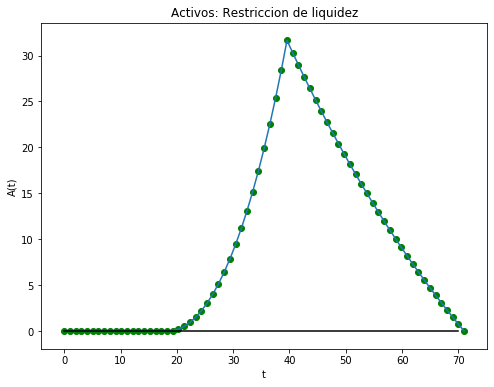

In [15]:
# Y grafiquemos
X = np.linspace(0,T+1,T+1)
y_ax_bound = 2*max(max(Y),max(abs(A_t)))
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, A_t,Fcero, 'black')
plt.scatter(X, A_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('A(t)')
plt.ylim=(A_bound-0.02,y_ax_bound)

plt.title(r"Activos: Restriccion de liquidez")
plt.savefig("Activos Restriccion de liquidez.pdf")
plt.show()


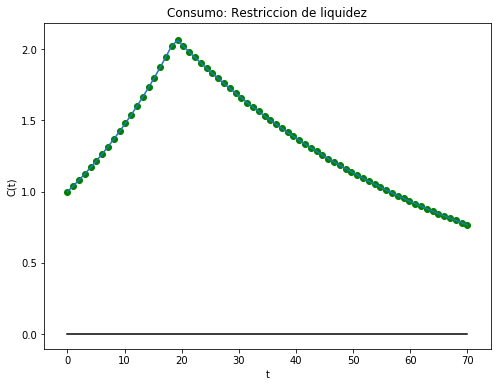

In [16]:
X = np.linspace(0,T,T)
plt.figure(figsize=(8, 6))
Fcero=np.zeros(T+1)
plt.plot(X, C_t,Fcero, 'black')
plt.scatter(X, C_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('C(t)')
plt.title(r"Consumo: Restriccion de liquidez")
plt.ylim=(0,2*max(Y))
plt.savefig("Consumo Restriccion de liquidez.pdf")
plt.show()


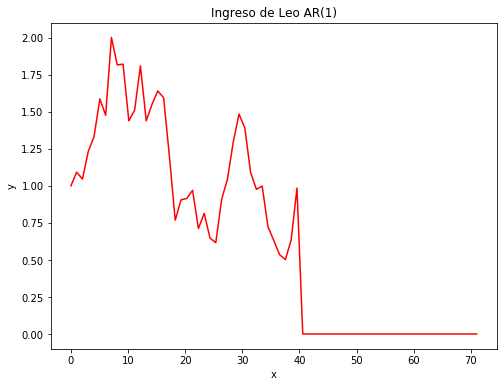

In [17]:
################################################################################
#INCISO 4: PROCESO AR(1)
################################################################################

################################################################################
# 1) Problema de Ahorro Optimo de Leo Messi: Definicion del Problema
################################################################################


## Valores de los parametros
beta   = 0.98  ; # Factor de descuento de Leo
#sigma  = 1.5   ; # Coeficiente de aversion al riesgo de Messi
T      = 70    ; # Horizonte de vida que le queda a la pulga
A_0    = 0     ; # Valor inicial de sus activos
A_T    = 0     ; # Herencia que deja Leo a Thiago Messi

## Sendas para las variables exogenas

# Tasa de interes a la que Mascherano presta (o pide prestado) a Leo

R = 1/beta-0.02 # Perfil de consumo creciente (Se endeuda)

#El ingreso de Leo es un proceso AR(1)
Y = np.arange(T+1).astype(np.float)
rho=0.8
sigma= 0.2
epsilon=np.random.normal(loc=0,scale=sigma,size=T+1)

Y[0] = 1
for t in range(1,T+1):
    Y[t]=Y[0]*(1-rho)+rho*Y[t-1]+epsilon[t]
Y[40:T+1]=0 # Se retira a los 40


# Veamos como luce el ingreso
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

X = np.linspace(0,T+1,T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Ingreso de Leo AR(1)")
plt.savefig("Ingreso de Leo AR(1).pdf")
plt.show()

# Note que Leo no solo tiene gran vision en el campo de juego sino tambien en
# este modelo

# Esto le permite saber con certeza su ingreso en cada periodo de su vida,
# inclusive su ingreso futuro



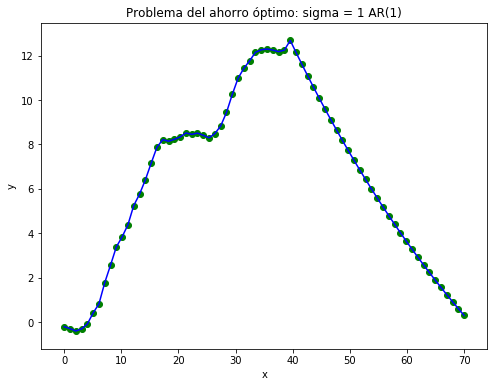

In [18]:
## Funcion de utilidad instantanea de Leo
def U_t(C):
    if sigma==1:
        return np.log(C)
    else:
        return(C**(1-sigma)-1)/(1-sigma)

## Funcion objetivo de Leo
def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec)             # Vector con el rezago de los acivos
    A_vec     = np.append(A_vec, A_T)            # Vector de activos
    C_vec     = R*A_vec_lag+Y-A_vec       # Vector de consumo en cada periodo
    beta_vec  = beta**(np.arange(0,T+1))  # Vector con tasas de descuento
    bienestar = sum(beta_vec*U_t(C_vec))  # Funcion objetivo del problema
    return -bienestar #Devuelve -bienestar porque se quiere maximizar la utilidad

################################################################################
# 2) Problema de Ahorro Optimo de Leo Messi: Solucion cuando sigma = 1
################################################################################
sigma=1
# Bajo ciertos supuestos, la solucion del modelo se puede hallar con lapiz y 
# papel: sigma=1 y A0=AT=0

# Valor presente del ingreso de Leo
Y_bar= sum(Y/(R**(np.arange(T+1))))

# Consumo
C0 = ((1-beta)/(1-beta**(T+1)))*Y_bar
C_initval = ((beta*R)**(np.arange(T+1)))*C0

# Activos 
A_initval= np.zeros(T).astype(np.float)
A_initval[0] = R*A_0+Y[0]-C_initval[0]
for t in range(1,T):
    A_initval[t] = R*A_initval[t-1]+Y[t]-C_initval[t]

    
# Y grafiquemos
X = np.linspace(0,T,T)
plt.figure(figsize=(8, 6))
plt.plot(X, A_initval, 'b')
plt.scatter(X, A_initval, s=None, color="green") 
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Problema del ahorro óptimo: sigma = 1 AR(1)")
plt.savefig("Ahorro óptimo sigma igual a 1 AR(1).pdf")
plt.show()

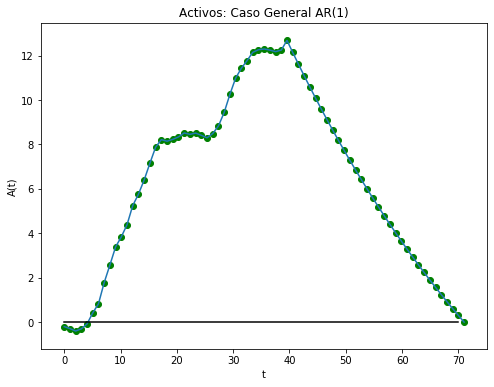

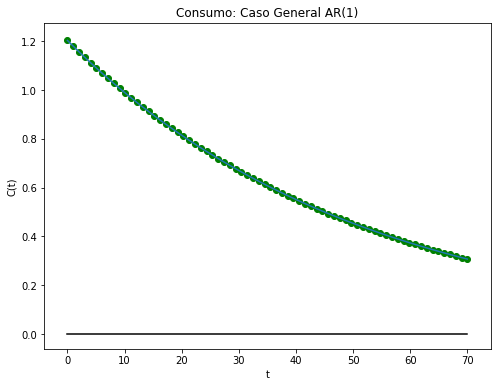

In [19]:
################################################################################
#INCISO A: SE ENDEUDA
################################################################################

import scipy as spy
from scipy.optimize import minimize

################################################################################
# 3) Problema de Ahorro Optimo de Leo Messi: Solucion cuando sigma != 1
################################################################################

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial
x0=A_initval 
minimize(messi_func, x0)
A_t=minimize(messi_func, x0).x


# Peguemos el valor terminal
A_t = np.append(A_t,A_T)

# Calculemos el consumo de Leo
C_t = np.zeros(T).astype(np.float)

for t in range(0,T):
    if t==0:
        C_t[0] = A_0*R+Y[0]-A_t[0]
        
    else:
        C_t[t] = A_t[t-1]*R+Y[t]-A_t[t]
        
# Y grafiquemos
X = np.linspace(0,T+1,T+1)
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, A_t,Fcero, 'black')
plt.scatter(X, A_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('A(t)')
plt.title(r"Activos: Caso General AR(1)")
plt.savefig("Activos Caso General AR(1).pdf")
plt.show()


X = np.linspace(0,T,T)
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, C_t,Fcero, 'black')
plt.scatter(X, C_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('C(t)')
plt.title(r"Consumo: Caso General AR(1)")
plt.savefig("Consumo Caso General AR(1).pdf")
plt.show()



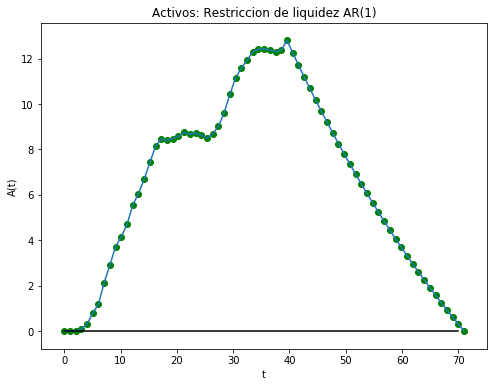

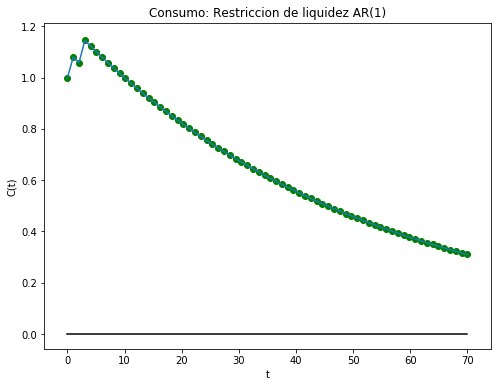

In [20]:
################################################################################
# INCISO B: RESTRICCION DE LIQUIDEZ
################################################################################

################################################################################
# 3) Problema de Ahorro Optimo de Leo Messi: Solucion con restricciones de deuda
################################################################################

# Supongamos ahora que el malvado gobierno espanol,al servicio del Real Madrid,
# decide atacar a Leo con un proceso por fraude fiscal. Esto impide al mejor de
# la historia contraer deudas por encima de un umbral A_bound, incluso con su
# amigo Mascherano

# Por lo anterior, At>=A_bound en todo periodo

# Usamos el algoritmo optim() incluyendo una restriccion de desigualdad en cero

A_bound = 0
# A_bound = -0.1

# Valor inicial
x0 = np.zeros(len(A_initval)).astype(np.float)
for i in range(0,len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])

# Usamos el tercer argumento para indicar la cota inferior para At
lower=np.repeat(A_bound,len(x0))
upper=np.repeat(None,len(x0))
limites=np.hstack((lower[:,None],upper[:,None]))
resultados2 = minimize(messi_func, x0,method="L-BFGS-B",bounds=limites)

A_t = resultados2.x

# Peguemos el valor terminal
A_t = np.append(A_t,A_T)

# Calculemos el consumo de Messi
C_t = np.zeros(T).astype(np.float)

for t in range(0,T):
    if t==0:
        C_t[0] = A_0*R+Y[0]-A_t[0]
    else:
        C_t[t] = A_t[t-1]*R+Y[t]-A_t[t]

# Y grafiquemos
X = np.linspace(0,T+1,T+1)
y_ax_bound = 2*max(max(Y),max(abs(A_t)))
Fcero=np.zeros(T+1)
plt.figure(figsize=(8, 6))
plt.plot(X, A_t,Fcero, 'black')
plt.scatter(X, A_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('A(t)')
plt.ylim=(A_bound-0.02,y_ax_bound)

plt.title(r"Activos: Restriccion de liquidez AR(1)")
plt.savefig("Activos Restriccion de liquidez AR(1).pdf")
plt.show()

X = np.linspace(0,T,T)
plt.figure(figsize=(8, 6))
Fcero=np.zeros(T+1)
plt.plot(X, C_t,Fcero, 'black')
plt.scatter(X, C_t, s=None, color="green") 
plt.xlabel('t')
plt.ylabel('C(t)')
plt.title(r"Consumo: Restriccion de liquidez AR(1)")
plt.ylim=(0,2*max(Y))
plt.savefig("Consumo Restriccion de liquidez AR(1).pdf")
plt.show()

In [21]:
################################################################################
# INCISO C: SIMULACION
################################################################################
import numpy as np
import scipy as spy
import scipy.optimize as opt
from scipy.optimize import minimize
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Funcion de utilidad instantanea de Leo
def U_t(C):
    if sigma==1:
        return np.log(C)
    else:
        return(C**(1-sigma)-1)/(1-sigma)

## Funcion objetivo de Leo
def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec)             # Vector con el rezago de los acivos
    A_vec     = np.append(A_vec, A_T)            # Vector de activos
    C_vec     = R*A_vec_lag+Y-A_vec       # Vector de consumo en cada periodo
    beta_vec  = beta**(np.arange(0,T+1))  # Vector con tasas de descuento
    bienestar = sum(beta_vec*U_t(C_vec))  # Funcion objetivo del problema
    return -bienestar

In [26]:
## Valores de los parametros
beta   = 0.98  ; # Factor de descuento de Leo
sigma  = 2     ; # Coeficiente de aversion al riesgo de Messi
T      = 70    ; # Horizonte de vida que le queda a la pulga
A_0    = 0     ; # Valor inicial de sus activos
A_T    = 0     ; # Herencia que deja Leo a Thiago Messi

## Sendas para las variables exogenas

# Tasa de interes a la que Mascherano presta (o pide prestado) a Leo
R = 1/beta-0.02 # Perfil de consumo creciente (Se endeuda)
#R = 1/beta+0.02 # Perfil de consumo decreciente (Ahorra)
#R = 1/beta      # Perfil de consumo constante a traves del tiempo

In [27]:
################################################################################
# PROMEDIO DE CT CUANDO NO HAY RESTRICCIONES DE DEUDA
################################################################################

Y = np.ones(T+1)

rho=0.8
nSim = 10000

C_T_prom = np.zeros(nSim).astype(np.float)
for i in range(nSim):
    Y = np.arange(T+1).astype(np.float) #lista vacia
    Y[0] = 1 #primer dato de la lista
    sigma=0.2
    epsilon = np.random.normal(loc=0, scale= sigma, size=T+1)
    
    for t in range(1,T+1):
        Y[t]=Y[0]*(1-rho)+rho*Y[t-1]+epsilon[t]
    Y[40:T+1]=0 # Se retira a los 40
    
    sigma=1
    # Bajo ciertos supuestos, la solucion del modelo se puede hallar con lapiz y 
    # papel: sigma=1 y A0=AT=0

    # Valor presente del ingreso de Leo
    Y_bar= sum(Y/(R**(np.arange(T+1))))

    # Consumo
    C0 = ((1-beta)/(1-beta**(T+1)))*Y_bar
    C_initval = ((beta*R)**(np.arange(T+1)))*C0

    # Activos 
    A_initval= np.zeros(T).astype(np.float)
    A_initval[0] = R*A_0+Y[0]-C_initval[0]
    for t in range(1,T):
        A_initval[t] = R*A_initval[t-1]+Y[t]-C_initval[t]
    
    # Ahora usaremos la solucion particular como valor inicial
    x0=A_initval 
    minimize(messi_func, x0)
    A_t=minimize(messi_func, x0).x
    
    # Peguemos el valor terminal
    A_t = np.append(A_t,A_T)

    # Calculemos el consumo de Leo
    C_t = np.zeros(T).astype(np.float)

    for tt in range(0,T):
        if t==0:
            C_t[0] = A_0*R+Y[0]-A_t[0]

        else:
            C_t[tt] = A_t[tt-1]*R+Y[tt]-A_t[tt]
    C_T_prom[i,]= np.mean(C_t)
    
    

In [28]:
C_T_prom= np.mean(C_t)
C_T_prom

array([0.65240931, 0.66074181, 0.57138642, ..., 0.69933219, 0.60290582,
       0.78517091])

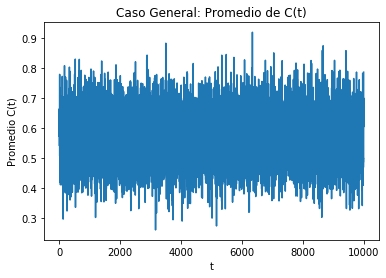

In [29]:
#Graficamos el promedio de las Cts del caso general
plt.plot(C_T_prom)
plt.xlabel('t')
plt.ylabel('Promedio C(t)')
plt.title(r"Caso General: Promedio de C(t)")
plt.savefig("Caso General Simulacion Promedio de C(t).pdf")
plt.show()